In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
np.set_printoptions(suppress=True)
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])
T1 = 600
T2 = 100

In [3]:
class rotate:
    def __init__(self,T1,T2,alpha,t):
        self.T1 = T1
        self.T2 = T2
        self.alpha = alpha
        self.t = t
        c, s = np.cos(self.alpha), np.sin(self.alpha)
        self.rz = np.array([[c,-s,0],[s,c,0],[0,0,1]])
        self.ry = np.array([[1,0,0],[0,c,-s],[0,s,c]])
        self.rx = np.array([[c,0,s],[0,1,0],[-s,0,c]])
    def __matmul__(a,b):
        return a@b

class rotate:
    def __init__(self,a):
        self.a = a
    def __matmul__(self,b):
        return self.a@b.a

In [4]:
def rotz(t,omega):
    c, s = np.cos(omega*t), np.sin(omega*t)
    cos = np.multiply.outer(c,np.array([[1,0,0],[0,1,0],[0,0,0]]))
    sin = -1*np.multiply.outer(s,np.array([[0,1,0],[-1,0,0],[0,0,0]]))
    z = np.multiply.outer(np.ones(len(t)),np.array([[0,0,0],[0,0,0],[0,0,1]]))
    rz = cos+sin+z
    return rz
def roty(t,omega):
    c, s = np.cos(omega*t), np.sin(omega*t)
    cos = np.multiply.outer(c,np.array([[1,0,0],[0,0,0],[0,0,1]]))
    sin = -1*np.multiply.outer(s,np.array([[0,0,-1],[0,0,0],[1,0,0]]))
    y = np.multiply.outer(np.ones(len(t)),np.array([[0,0,0],[0,1,0],[0,0,0]]))
    ry = cos+sin+y
    return ry
def rotx(t,omega):
    c, s = np.cos(omega*t), np.sin(omega*t)
    cos = np.multiply.outer(c,np.array([[0,0,0],[0,1,0],[0,0,1]]))
    sin = -1*np.multiply.outer(s,np.array([[0,0,0],[0,0,1],[0,-1,0]]))
    x = np.multiply.outer(np.ones(len(t)),np.array([[1,0,0],[0,0,0],[0,0,1]]))
    rx = cos+sin+x
    return rx
def rotn(t,phi,theta):
    rn = rotz(t,theta)@rotx(t,phi)@rotz(t,-theta)
    return rn
    
t = np.linspace(0,1000,1001);omega=10/1000*2*np.pi;T1=600;T2=100



def evolution(T1,T2,omega,t):
    T2_decay = np.exp(-t/T2)
    T1_decay = np.exp(-t/T1)
    T2_relax = np.array([[1,0,0],[0,1,0],[0,0,0]])
    T1_relax = np.array([[0,0,0],[0,0,0],[0,0,1]])
    Mz_relax = np.array([0,0,1-T1_decay])
    T2_evo = np.multiply.outer(T2_decay,T2_relax)
    T1_evo = np.multiply.outer(T1_decay,T1_relax)
    B = np.array([0,0,1])-np.multiply.outer(T1_decay,np.array([0,0,1]))
    rz = rotz(t,omega)
    return ((T1_evo+T2_evo)@rz@np.array([1,0,0])+B)

In [5]:
evo = evolution(T1,T2,omega,t)

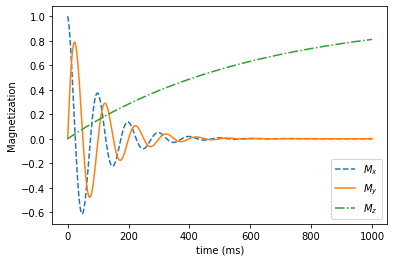

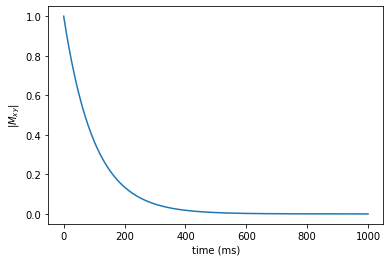

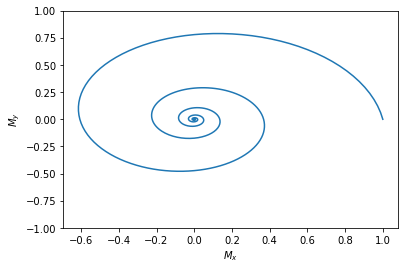

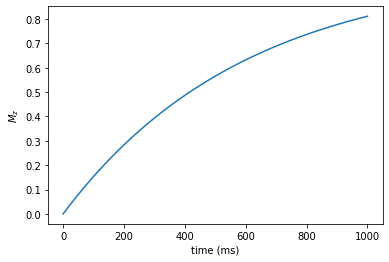

In [6]:
def plot_mag(evo):
    mxy = np.sqrt(np.sum(abs(evo[:,:2])**2,axis=1))
    mx = evo[:,0]
    my = evo[:,1]
    mz = evo[:,2]
    plt.figure()
    plt.plot(t,mx,'--',label='$M_x$')
    plt.plot(t,my,label='$M_y$')
    plt.plot(t,mz,'-.',label='$M_z$')
    plt.ylabel('Magnetization')
    plt.xlabel('time (ms)')
    plt.legend()
def plot_decay(evo):
    mxy = np.sqrt(np.sum(abs(evo[:,:2])**2,axis=1))
    mx = evo[:,0]
    my = evo[:,1]
    mz = evo[:,2]
    plt.figure()
    plt.ylabel('$|M_{xy}|$')
    plt.xlabel('time (ms)')
    plt.plot(t,mxy)
    plt.figure()
    plt.xlabel('$M_x$')
    plt.ylabel('$M_{y}$')
    plt.ylim([-1,1])
    plt.plot(mx,my)
    plt.figure()
    plt.ylabel('$M_z$')
    plt.xlabel('time (ms)')
    plt.plot(t,mz)

plot_mag(evo)
plot_decay(evo)

In [7]:
from scipy.spatial.transform import Rotation as R

In [8]:
r = R.from_quat([0, np.sin(np.pi/4), 0, np.cos(np.pi/4)])

In [9]:
r.as_euler('zxz',degrees=True)

array([-90.,  90.,  90.])

In [10]:
r.as_dcm()

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

# Contrast to Noise

In [11]:

tr = np.arange(0,20000,1)
t1wm = 1200
t1gm = 2000
t2wm = 32
t2gm = 36
rhowm = 0.65
rhogm = 0.8

teopt = np.log(rhogm/t2gm)-np.log(rhowm/t2wm)+np.log((1-np.exp(-tr/t1gm))/(1-np.exp(-tr/t1wm)))


C:\Users\jamalzada\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


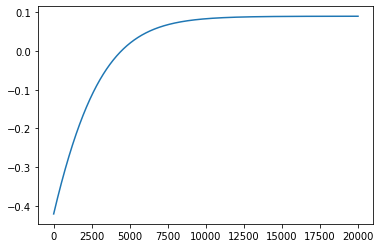

In [12]:
plt.plot(tr,teopt)

In [13]:
tr=10000
rhogm,rhowm = 1,1
te = np.arange(0,1000,1)
cnr = rhogm*(1-np.exp(-tr/t1gm))*np.exp(-te/t2gm)-rhowm*(1-np.exp(-tr/t1wm))*np.exp(-te/t2wm)

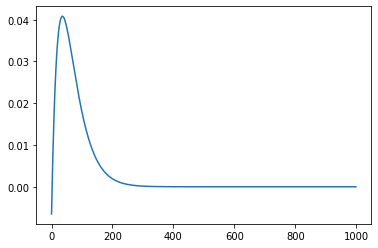

In [14]:
plt.plot(te,cnr)

In [15]:

teopt = 1/(1/t2gm-1/t2wm)*(np.log(rhowm/t2wm)-np.log(rhogm/t2gm)+np.log((1-np.exp(-tr/t1wm))/(1-np.exp(-tr/t1gm))))

In [16]:
teopt

-35.79937537999092

In [17]:
np.argmax(cnr)

36

In [18]:
np.log(rhowm/t2wm)-np.log(rhogm/t2gm)

0.11778303565638337

In [19]:
tr = np.arange(0,1000,1)
t1wm = 1200
t1gm = 2000
t2wm = 32
t2gm = 36
rhowm = 0.65
rhogm = 0.8

def sig(rho,t1,t2,tr,te):
    s = rho*(1-np.exp(-tr/t1))*np.exp(-te/t2)
    return s


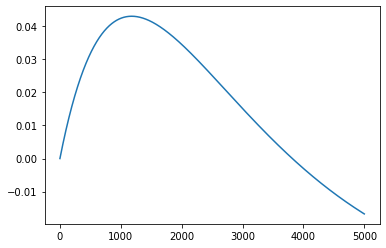

In [27]:
t = np.arange(0,5000,1)

sa=sig(rho=1,t1=1200,t2=32,tr=t,te=34)
sb=sig(rho=1,t1=2000,t2=36,tr=t,te=34)
cab = sa-sb
plt.plot(cab)


In [88]:
teint=34
delta_f = 0.01
rho1int=1
rho2int=1

fig,ax = plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.25)
t = np.arange(0,5000,1)
sa=sig(rho=1,t1=1200,t2=32,tr=t,te=34)
sb=sig(rho=1,t1=2000,t2=36,tr=t,te=34)
cab = sa-sb
plt.xlabel('TR')
plt.ylabel('CNR')
l, = plt.plot(t,cab,label='CNR GM and WM',lw=2)
plt.legend()

axcolor = 'lightgoldenrodyellow'
axrho1 = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axrho2 = plt.axes([0.25,0.15,0.65,0.03], facecolor=axcolor)
axte = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)


srho1 = Slider(axrho1, 'rho1', 0.1, 2, valinit=rho1int, valstep=delta_f)
srho2 = Slider(axrho2, 'rho2', 0.1, 2, valinit=rho1int, valstep=delta_f)
ste = Slider(axte, 'TE', 0.1, 50, valinit=teint)

def update(val):
    sa=sig(rho=srho1.val,t1=1200,t2=32,tr=t,te=ste.val)
    sb=sig(rho=srho2.val,t1=2000,t2=36,tr=t,te=ste.val)
    cab = sa-sb
    l.set_ydata(cab)
    fig.canvas.draw_idle()

srho1.on_changed(update)
srho2.on_changed(update)
ste.on_changed(update)

resetax = plt.axes([0.8, 0.005, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    srho1.reset()
    srho2.reset()
    ste.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()